       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


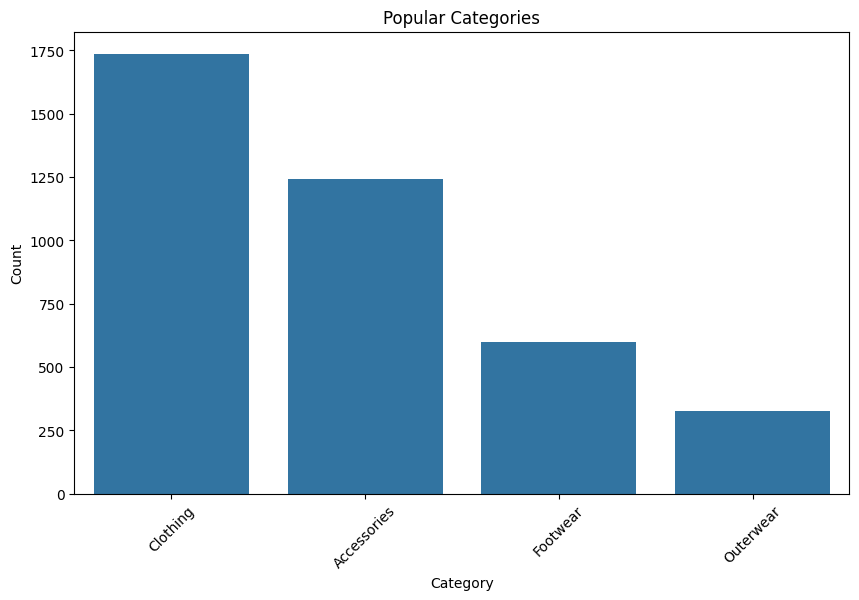

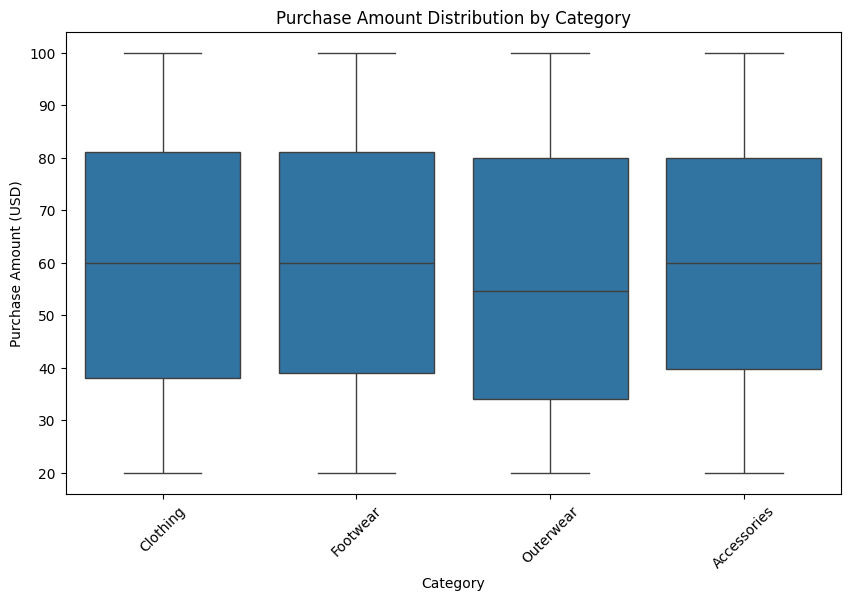

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('shopping_trends.csv')

# Summary statistics
print(df.describe())

# Bar plot for popular categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Popular Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Box plot for Purchase Amount by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()


<ipython-input-3-df7b6ef9cdae>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Frequency of Purchases'] = le.fit_transform(features['Frequency of Purchases'])


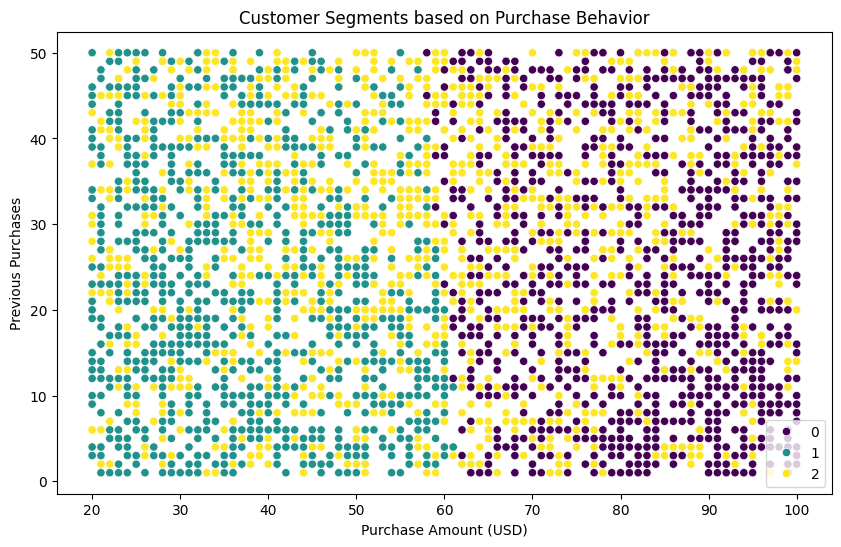

In [3]:
!pip install scikit-learn
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Select features for clustering
features = df[['Purchase Amount (USD)', 'Previous Purchases', 'Frequency of Purchases']]

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Frequency of Purchases' column
features['Frequency of Purchases'] = le.fit_transform(features['Frequency of Purchases'])

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Purchase Amount (USD)', y='Previous Purchases', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments based on Purchase Behavior')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Previous Purchases')
plt.legend()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Convert categorical variables to numerical
df['Subscription_Status_Encoded'] = df['Subscription Status'].apply(lambda x: 1 if x == 'Yes' else 0)

# Features and target
X = df[['Age', 'Review Rating', 'Purchase Amount (USD)', 'Previous Purchases']]
y = df['Subscription_Status_Encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6897435897435897
              precision    recall  f1-score   support

           0       0.72      0.94      0.81       558
           1       0.31      0.07      0.12       222

    accuracy                           0.69       780
   macro avg       0.51      0.50      0.46       780
weighted avg       0.60      0.69      0.61       780



In [5]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a pivot table for content-based filtering
pivot_table = df.pivot_table(index='Customer ID', columns='Item Purchased', values='Review Rating', fill_value=0)

# Calculate cosine similarity
similarity_matrix = cosine_similarity(pivot_table)

# Display similarity matrix
print("Similarity matrix for content-based filtering:")
print(similarity_matrix)


Similarity matrix for content-based filtering:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


<ipython-input-7-d0d59d98d1ae>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_features['Frequency of Purchases'] = le.fit_transform(clustering_features['Frequency of Purchases']) # Convert 'Frequency of Purchases' to numerical using Label Encoding


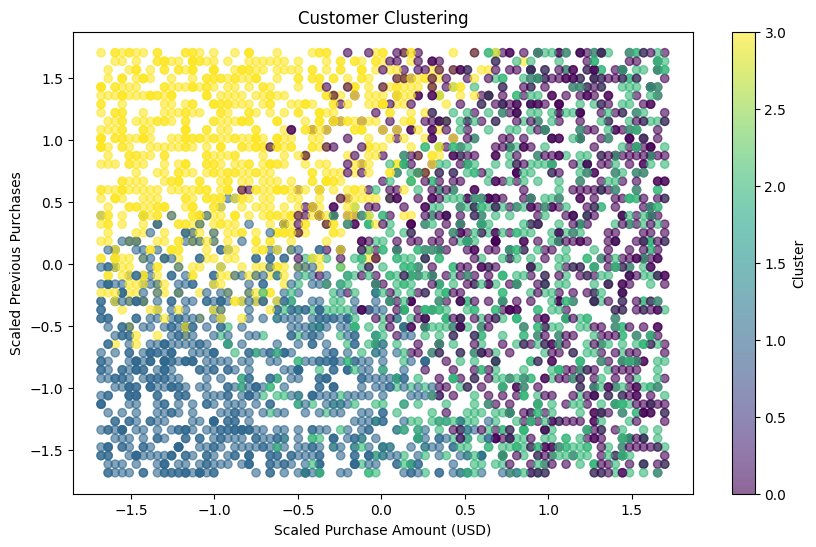

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Load dataset
file_path = 'shopping_trends.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Select features for clustering
clustering_features = data[['Purchase Amount (USD)', 'Previous Purchases', 'Frequency of Purchases']]

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Frequency of Purchases' column
clustering_features['Frequency of Purchases'] = le.fit_transform(clustering_features['Frequency of Purchases']) # Convert 'Frequency of Purchases' to numerical using Label Encoding

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose 4 clusters as an example
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Scaled Purchase Amount (USD)')
plt.ylabel('Scaled Previous Purchases')
plt.title('Customer Clustering')
plt.colorbar(label='Cluster')
plt.show()


In [8]:
# Calculate RFM Metrics
rfm = data.groupby('Customer ID').agg({
    'Purchase Amount (USD)': 'sum',  # Monetary
    'Frequency of Purchases': 'sum',  # Frequency
    'Previous Purchases': 'max'  # Recency (days since the last purchase, assuming this column exists)
}).reset_index()
rfm.columns = ['Customer ID', 'Monetary', 'Frequency', 'Recency']

# Categorize customers based on RFM scores
rfm['Loyalty Tier'] = pd.qcut(rfm['Monetary'], q=4, labels=['Bronze', 'Silver', 'Gold', 'Platinum'])
print(rfm.head())


   Customer ID  Monetary    Frequency  Recency Loyalty Tier
0            1        53  Fortnightly       14       Silver
1            2        64  Fortnightly        2         Gold
2            3        73       Weekly       23         Gold
3            4        90       Weekly       49     Platinum
4            5        49     Annually       31       Silver


<ipython-input-9-c633bb1d3633>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Purchase Amount (USD)', data=season_trends, palette='coolwarm')


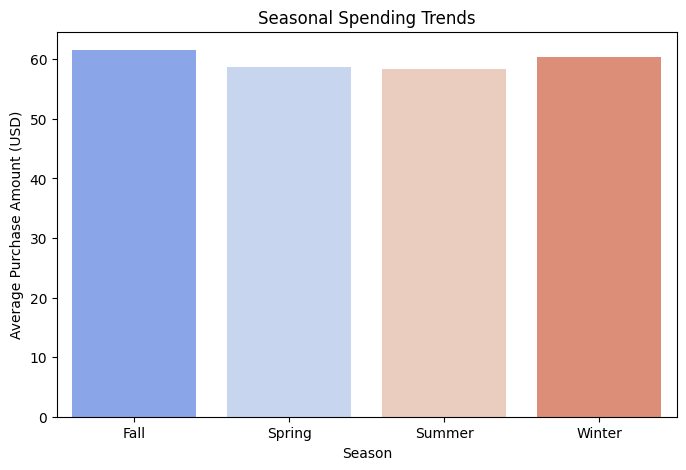

In [9]:
import seaborn as sns

# Average Purchase Amount by Season
season_trends = data.groupby('Season')['Purchase Amount (USD)'].mean().reset_index()

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='Season', y='Purchase Amount (USD)', data=season_trends, palette='coolwarm')
plt.title('Seasonal Spending Trends')
plt.ylabel('Average Purchase Amount (USD)')
plt.xlabel('Season')
plt.show()


<ipython-input-10-6fc7cd22b7fc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount Applied', y='Purchase Amount (USD)', data=discount_trends, palette='viridis')


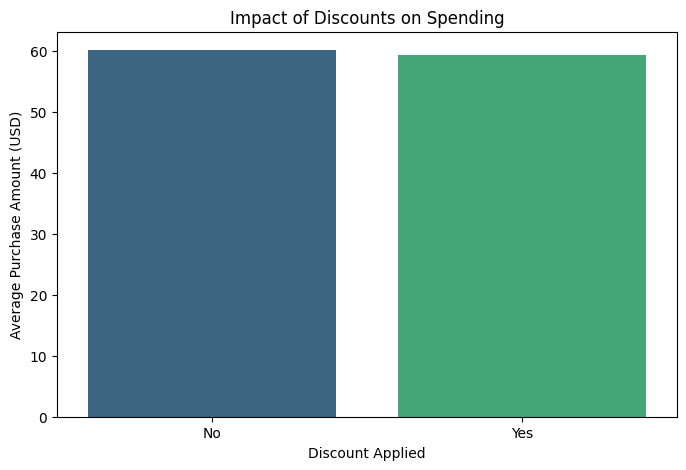

In [10]:
# Compare average purchase amount with and without discounts
discount_trends = data.groupby('Discount Applied')['Purchase Amount (USD)'].mean().reset_index()

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='Discount Applied', y='Purchase Amount (USD)', data=discount_trends, palette='viridis')
plt.title('Impact of Discounts on Spending')
plt.ylabel('Average Purchase Amount (USD)')
plt.xlabel('Discount Applied')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Define Features and Target
X = data[['Age', 'Review Rating', 'Purchase Amount (USD)', 'Previous Purchases', 'Frequency of Purchases']]

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Frequency of Purchases' column within X
X['Frequency of Purchases'] = le.fit_transform(X['Frequency of Purchases'])  # Convert to numerical

y = data['Subscription Status'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert Yes/No to binary

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Model
y_pred = rf_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


<ipython-input-12-db591ded9753>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Frequency of Purchases'] = le.fit_transform(X['Frequency of Purchases'])  # Convert to numerical



Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.82       558
           1       0.33      0.04      0.07       222

    accuracy                           0.70       780
   macro avg       0.53      0.50      0.45       780
weighted avg       0.61      0.70      0.61       780



In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine features for recommendation
data['Combined_Features'] = data['Category'] + ' ' + data['Color'] + ' ' + data['Size']

# Vectorize text features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['Combined_Features'])

# Compute similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix)

# Recommend items
def recommend_items(item_name, data, similarity_matrix, top_n=5):
    item_index = data[data['Item Purchased'] == item_name].index[0]
    similarity_scores = list(enumerate(similarity_matrix[item_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_items = [data.iloc[i[0]]['Item Purchased'] for i in similarity_scores[1:top_n+1]]
    return top_items

# Example Recommendation
recommended_items = recommend_items('Blouse', data, similarity_matrix)
print(f"Items Recommended for 'Blouse': {recommended_items}")


Items Recommended for 'Blouse': ['Shirt', 'Skirt', 'Sweater', 'Sweater', 'Sweater']


In [14]:
!pip install streamlit pandas matplotlib seaborn scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [15]:
# app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load dataset
@st.cache
def load_data():
    file_path = 'shopping_trends.csv'  # Replace with your dataset path
    data = pd.read_csv(file_path)
    return data

data = load_data()

# Dashboard Title
st.title("Shopping Trends Dashboard")
st.sidebar.title("Navigation")
options = st.sidebar.radio("Select Analysis", ["Overview", "Customer Segmentation", "Seasonal Trends", "Discount Impact", "Customer Churn"])

# Overview Section
if options == "Overview":
    st.header("Dataset Overview")
    st.write(data.head())
    st.subheader("Summary Statistics")
    st.write(data.describe())
    st.subheader("Dataset Info")
    st.write(data.info())

# Customer Segmentation Section
elif options == "Customer Segmentation":
    st.header("Customer Segmentation")
    st.subheader("K-Means Clustering")

    # Clustering Features
    clustering_features = data[['Purchase Amount (USD)', 'Previous Purchases', 'Frequency of Purchases']]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(clustering_features)

    # Apply K-Means
    kmeans = KMeans(n_clusters=4, random_state=42)
    data['Cluster'] = kmeans.fit_predict(scaled_features)

    # Plot Clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.6)
    plt.xlabel('Scaled Purchase Amount (USD)')
    plt.ylabel('Scaled Previous Purchases')
    plt.title('Customer Clustering')
    st.pyplot(plt)

    st.write("Cluster assignments:")
    st.write(data[['Customer ID', 'Cluster']].head())

# Seasonal Trends Section
elif options == "Seasonal Trends":
    st.header("Seasonal Trends")
    season_trends = data.groupby('Season')['Purchase Amount (USD)'].mean().reset_index()

    # Plot Seasonal Trends
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Season', y='Purchase Amount (USD)', data=season_trends, palette='coolwarm')
    plt.title('Seasonal Spending Trends')
    plt.ylabel('Average Purchase Amount (USD)')
    plt.xlabel('Season')
    st.pyplot(plt)

# Discount Impact Section
elif options == "Discount Impact":
    st.header("Impact of Discounts")
    discount_trends = data.groupby('Discount Applied')['Purchase Amount (USD)'].mean().reset_index()

    # Plot Discount Impact
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Discount Applied', y='Purchase Amount (USD)', data=discount_trends, palette='viridis')
    plt.title('Impact of Discounts on Spending')
    plt.ylabel('Average Purchase Amount (USD)')
    plt.xlabel('Discount Applied')
    st.pyplot(plt)

# Customer Churn Section
elif options == "Customer Churn":
    st.header("Customer Churn Prediction")

    # Features and Target
    X = data[['Age', 'Review Rating', 'Purchase Amount (USD)', 'Previous Purchases', 'Frequency of Purchases']]
    y = data['Subscription Status'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest Classifier
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictions
    y_pred = rf_model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    st.subheader("Classification Report")
    st.write(pd.DataFrame(report).transpose())

    # Feature Importance
    feature_importances = rf_model.feature_importances_
    feature_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    st.subheader("Feature Importance")
    st.bar_chart(feature_df.set_index('Feature'))


2025-01-18 22:08:38.483 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-18 22:08:38.762 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-18 22:08:38.775 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-18 22:08:38.777 
`st.cache` is deprecated and will be removed soon. Please use one of Streamlit's new
caching commands, `st.cache_data` or `st.cache_resource`. More information
[in our docs](https://docs.streamlit.io/develop/concepts/architecture/caching).

**Note**: The behavior of `st.cache` was updated in Streamlit 1.36 to the new caching
logic used by `st.cache_data` and `st.cache_resource`. This might lead to some problems
or unexpected behavior in certain edge cases.

2025-01-18 22:08:38.782 No runtime found, using MemoryCacheStorageManager
2025-01-18 22:08:38.786 No runtime found, using MemoryC

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [19]:
!pip install streamlit pyngrok

In [24]:
from pyngrok import ngrok

# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2rowhpisVIQRB1uNmsvFyOwRtql_5UDxEGVAjU193UtZsjK5j"  # Replace with your actual authtoken
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Start Streamlit in the background
!streamlit run app.py &>/dev/null&

# Expose the Streamlit app via ngrok
# The 'proto' field should be a string
public_url = ngrok.connect(proto="http", addr=8501)

print(f"Access your Streamlit app here: {public_url}")

Access your Streamlit app here: NgrokTunnel: "https://02c3-35-185-64-175.ngrok-free.app" -> "http://localhost:8501"



Best-Selling Categories:
      Category  Purchase Amount (USD)
1     Clothing                 104264
0  Accessories                  74200
2     Footwear                  36093
3    Outerwear                  18524


<ipython-input-25-3db92db127d5>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Purchase Amount (USD)', y='Category', data=category_sales, palette='viridis')


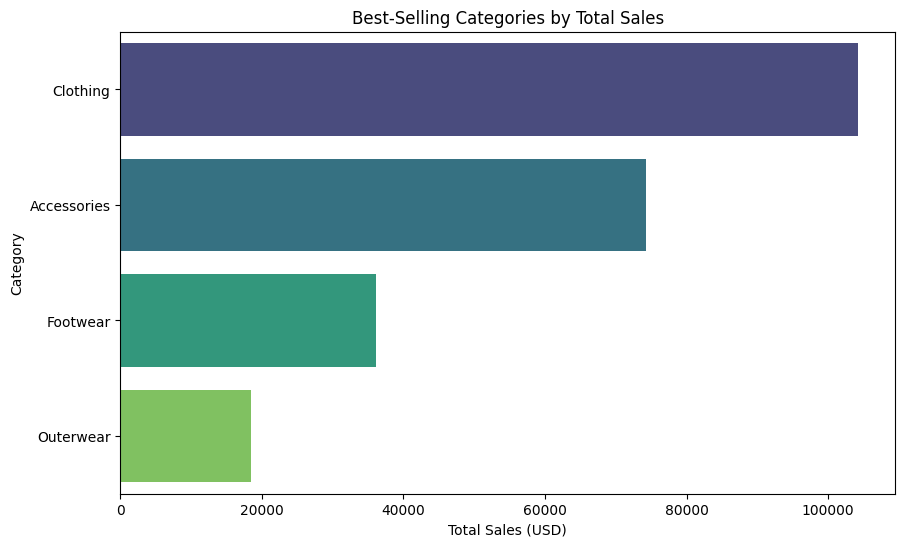


Best-Selling Products:
   Item Purchased  Purchase Amount (USD)
2          Blouse                  10410
16          Shirt                  10332
5           Dress                  10320
13          Pants                  10090
12        Jewelry                  10010


<ipython-input-25-3db92db127d5>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Purchase Amount (USD)', y='Item Purchased', data=product_sales.head(10), palette='coolwarm')


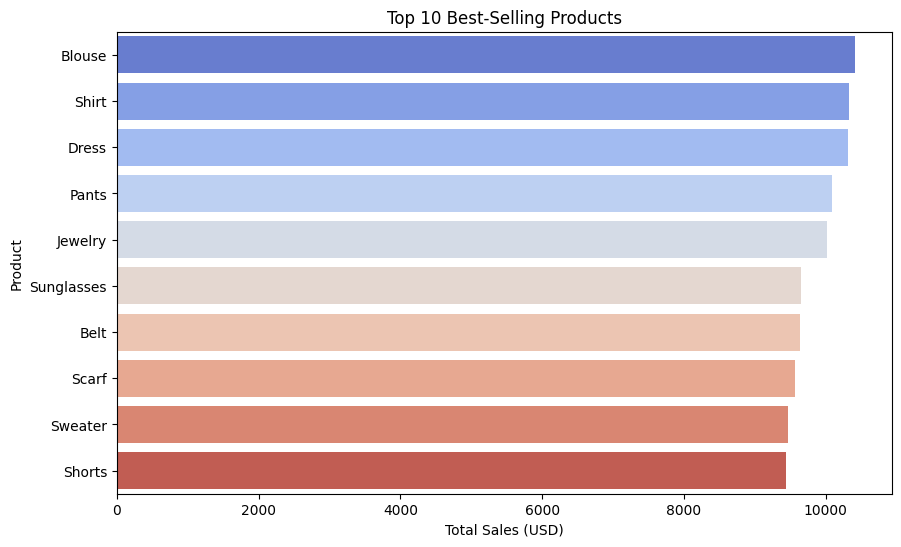

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'shopping_trends.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Best-Selling Categories
category_sales = data.groupby('Category')['Purchase Amount (USD)'].sum().reset_index().sort_values(by='Purchase Amount (USD)', ascending=False)
print("\nBest-Selling Categories:")
print(category_sales.head())

# Plot Best-Selling Categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Purchase Amount (USD)', y='Category', data=category_sales, palette='viridis')
plt.title('Best-Selling Categories by Total Sales')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Category')
plt.show()

# Best-Selling Products
product_sales = data.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index().sort_values(by='Purchase Amount (USD)', ascending=False)
print("\nBest-Selling Products:")
print(product_sales.head())

# Plot Best-Selling Products
plt.figure(figsize=(10, 6))
sns.barplot(x='Purchase Amount (USD)', y='Item Purchased', data=product_sales.head(10), palette='coolwarm')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Product')
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Prepare Features and Target
X = data[['Age', 'Previous Purchases', 'Discount Applied', 'Frequency of Purchases']]  # Add relevant features
y = data['Purchase Amount (USD)']

# Create a LabelEncoder object
le = LabelEncoder()

# Convert 'Discount Applied' and 'Frequency of Purchases' to numerical using Label Encoding
for col in ['Discount Applied', 'Frequency of Purchases']:
    X[col] = le.fit_transform(X[col])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Calculate RMSE without 'squared' argument
print(f"\nSales Prediction RMSE: {rmse:.2f}")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-30-f6edcf685b6f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-30-f6edcf685b6f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi


Sales Prediction RMSE: 25.79


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Define Features and Target
X = data[['Age', 'Frequency of Purchases', 'Previous Purchases', 'Discount Applied']]
y = (data['Purchase Amount (USD)'] > data['Purchase Amount (USD)'].mean()).astype(int)  # 1 = High Spending, 0 = Low Spending

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Frequency of Purchases' and 'Discount Applied' columns within X
for col in ['Frequency of Purchases', 'Discount Applied']:
    X[col] = le.fit_transform(X[col])  # Convert to numerical

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Model
y_pred = rf_model.predict(X_test)
print("\nClassification Report for Discount Impact Prediction:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-32-157b9d9d2ff8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])  # Convert to numerical
<ipython-input-32-157b9d9d2ff8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/


Classification Report for Discount Impact Prediction:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       408
           1       0.46      0.45      0.46       372

    accuracy                           0.49       780
   macro avg       0.49      0.49      0.49       780
weighted avg       0.49      0.49      0.49       780



/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppi71_6wd/klekuba0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppi71_6wd/nl_u2zt7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15374', 'data', 'file=/tmp/tmppi71_6wd/klekuba0.json', 'init=/tmp/tmppi71_6wd/nl_u2zt7.json', 'output', 'file=/tmp/tmppi71_6wd/prophet_modelfrg8rg_x/prophet_model-20250118223940.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:39:40 - cmdstanpy - INFO - Chain [1] start processing
IN

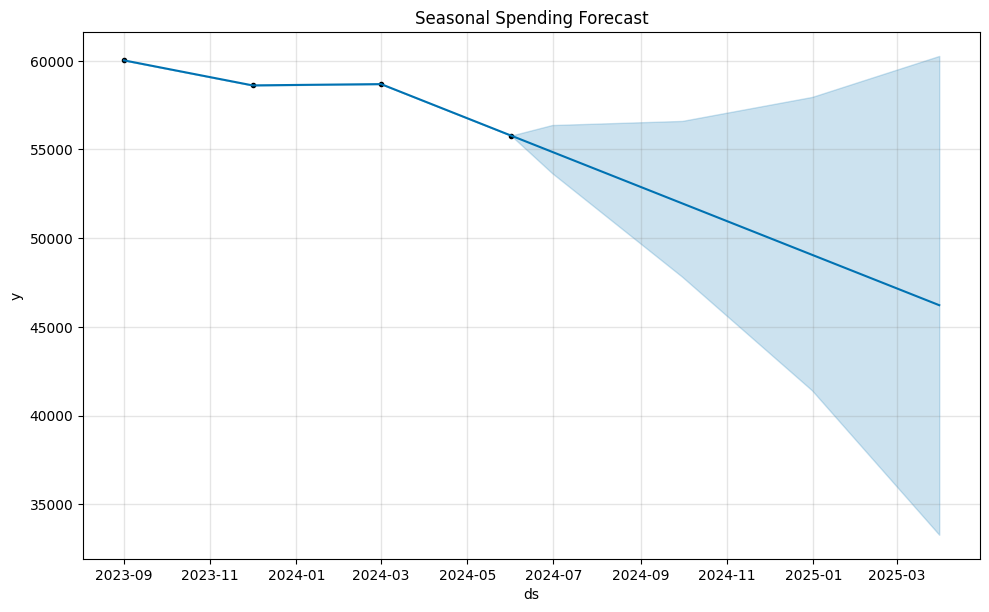

In [37]:
!pip install prophet # This line is correct and installs the prophet module
from prophet import Prophet # Change import statement to reflect the correct name of the prophet module
import pandas as pd

# Prepare data for time-series forecasting
seasonal_data = data.groupby('Season')['Purchase Amount (USD)'].sum().reset_index()
seasonal_data.columns = ['ds', 'y']  # Rename for Prophet compatibility

# Map season names to numerical values or date ranges
season_mapping = {
    'Fall': '2023-09-01',  # Example date for Fall
    'Winter': '2023-12-01', # Example date for Winter
    'Spring': '2024-03-01', # Example date for Spring
    'Summer': '2024-06-01'  # Example date for Summer
}
seasonal_data['ds'] = seasonal_data['ds'].map(season_mapping)
seasonal_data['ds'] = pd.to_datetime(seasonal_data['ds']) # Convert to datetime

# Fit the model
model = Prophet()
model.fit(seasonal_data)

# Create a future dataframe
future = model.make_future_dataframe(periods=4, freq='Q')  # Predict for the next 4 quarters
forecast = model.predict(future)

# Plot Forecast
model.plot(forecast)
plt.title("Seasonal Spending Forecast")
plt.show()
